In [814]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None

In [815]:
bank = pd.read_csv('D:\\DATA SCIENCE COURSE\\MACHINE LEARNING\\assignment 1\\bank-marketing.csv')
bank.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [816]:
bank.shape

(45211, 19)

In [817]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [818]:
bank.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [819]:
bank.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

So 75% of of values of pdays are -1 ,which might be a indication not a value .
we will use it as a Nan

In [820]:
bank1 =bank.copy()

In [821]:
bank1.drop(bank1[bank1['pdays']<0].index,inplace =True)

In [822]:
bank1.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000
mean,40.953131,57564.006298,1556.880102,14.289209,260.118687,2.056195,224.577692,3.177546
std,11.425180,31791.407761,3060.593186,7.919176,235.208105,1.561169,115.344035,4.560820
min,18.000000,0.000000,-1884.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,33.000000,20000.000000,168.000000,7.000000,113.000000,1.000000,133.000000,1.000000
50%,38.000000,60000.000000,602.000000,14.000000,193.000000,2.000000,194.000000,2.000000
75%,48.000000,70000.000000,1743.000000,20.000000,324.000000,2.000000,327.000000,4.000000
max,93.000000,120000.000000,81204.000000,31.000000,2219.000000,16.000000,871.000000,275.000000


The values -1 removed ,that means we removed the persons that were not contacted previously

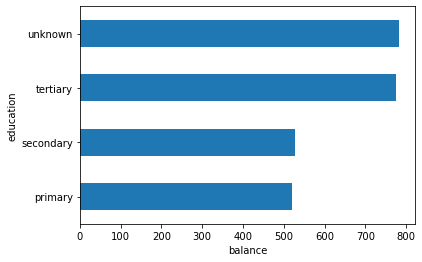

In [823]:
bank1.groupby(['education'])['balance'].median().plot.barh();
plt.xlabel('balance');

tertiary Group has highest median

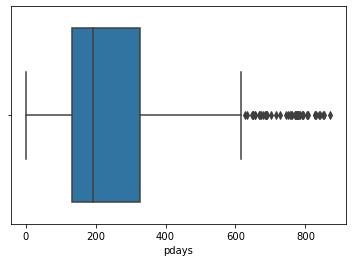

In [824]:
sns.boxplot(bank1['pdays']);

yes there are outliers in pdays

In [825]:
bank1.response.value_counts()

no     6352
yes    1905
Name: response, dtype: int64

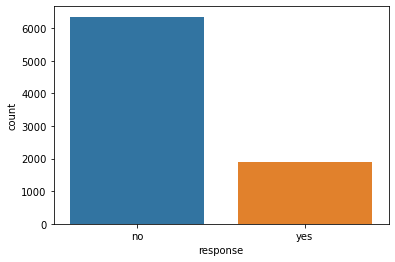

In [826]:
sns.countplot(bank1.response);

Dataset is not balanced and there are more negative values and convert it to convinient form

In [827]:
bank1.replace({'response':{'yes':1,'no':0}},inplace = True)
bank1.head(3)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1


In [828]:
bank1.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [829]:
features_names = ['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome']
training_features = bank1[features_names]

In [830]:
target_name = ['response']
target_variable = bank1[target_name]
target_variable

,response
24060,0
24062,1
24064,1
24072,0
24077,1
...,...
45199,0
45201,1
45204,1
45208,1


In [831]:
numeric_data = bank1.select_dtypes(include =[np.number])
categorical_data = bank1.select_dtypes(exclude =[np.number])


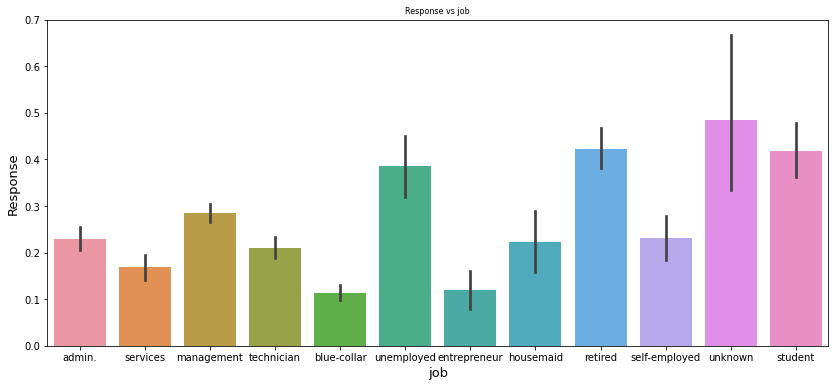

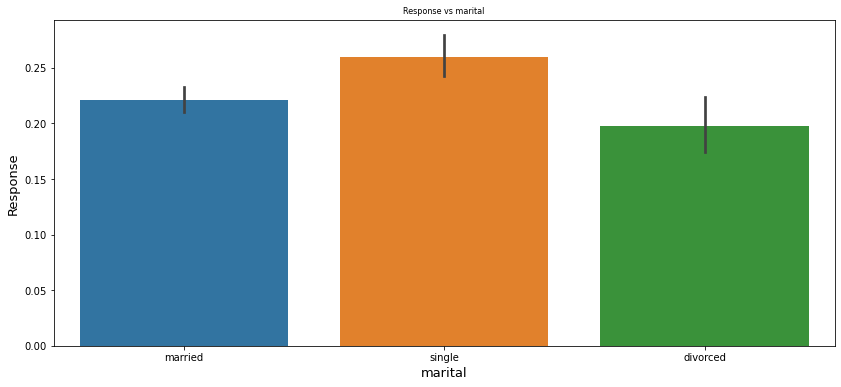

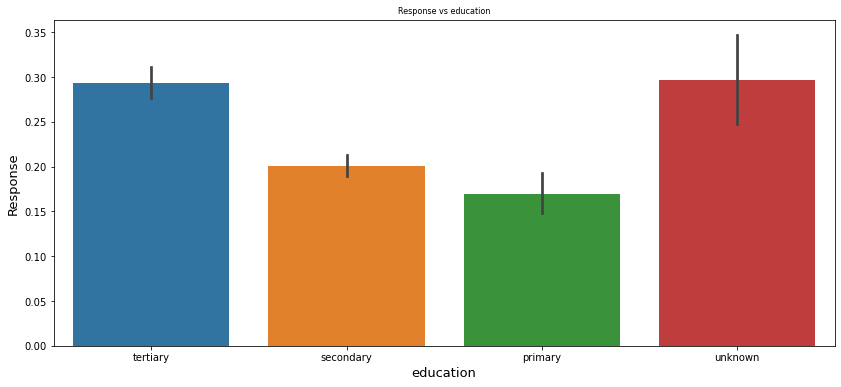

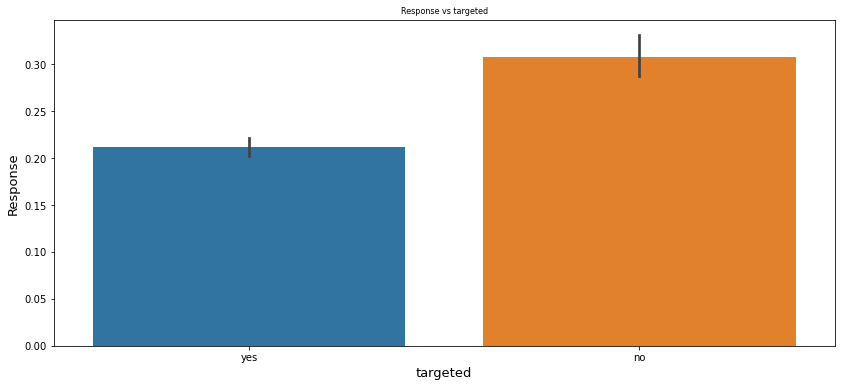

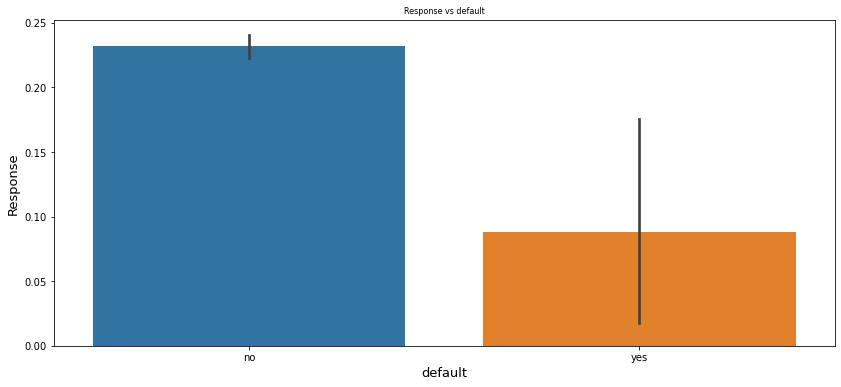

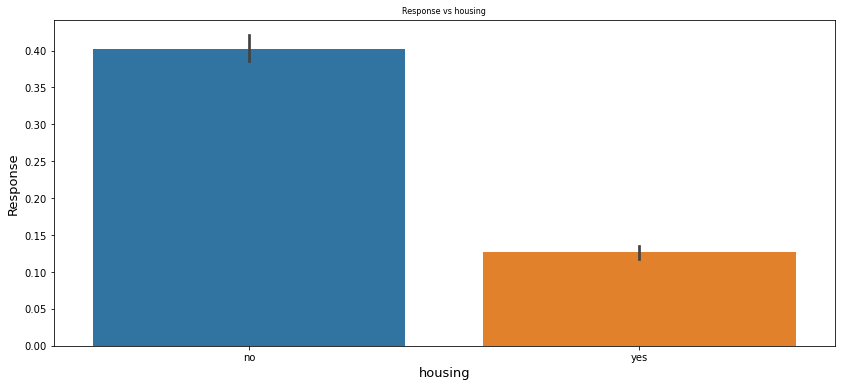

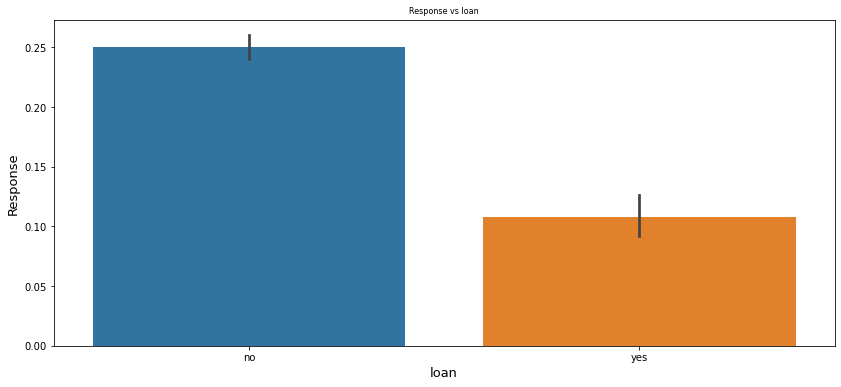

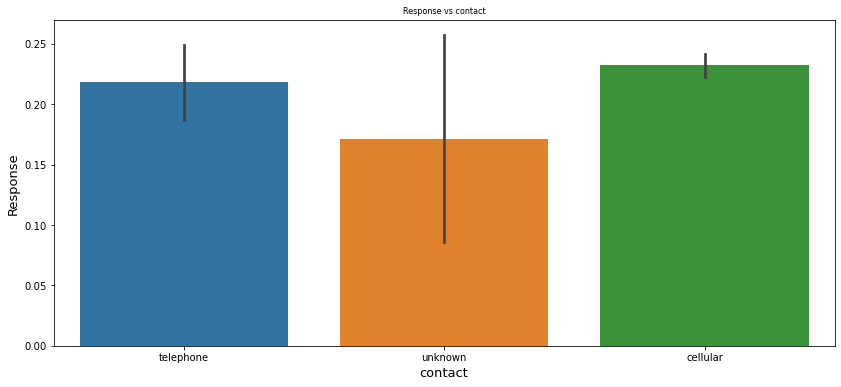

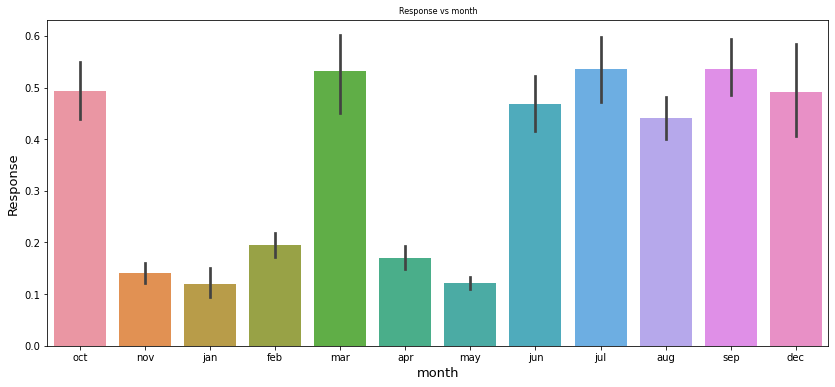

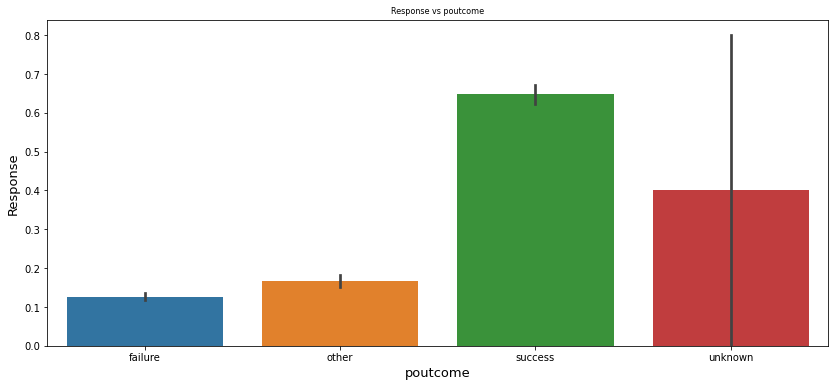

In [832]:
for col in  categorical_data[1:]:
    plt.figure(figsize=(14,6));
    sns.barplot(categorical_data[col],bank1['response']);
    plt.title("Response vs "+col,fontsize=8);
    plt.xlabel(col,fontsize=13)
    plt.ylabel("Response",fontsize=13)
    plt.show()


In [833]:
import warnings
warnings.filterwarnings('ignore')

<Figure size 864x576 with 0 Axes>

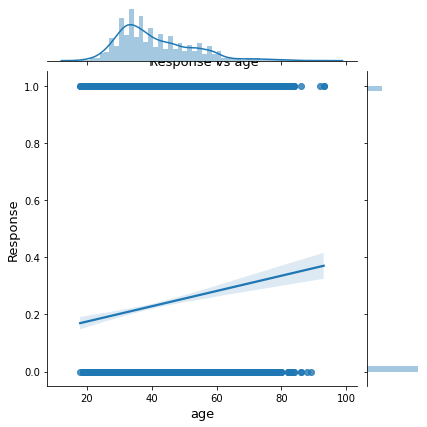

<Figure size 864x576 with 0 Axes>

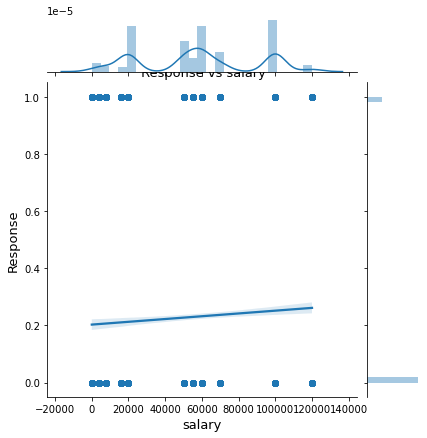

<Figure size 864x576 with 0 Axes>

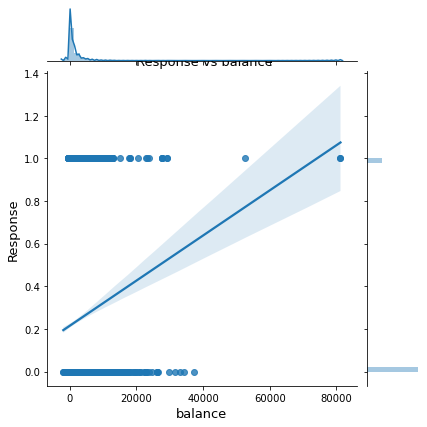

<Figure size 864x576 with 0 Axes>

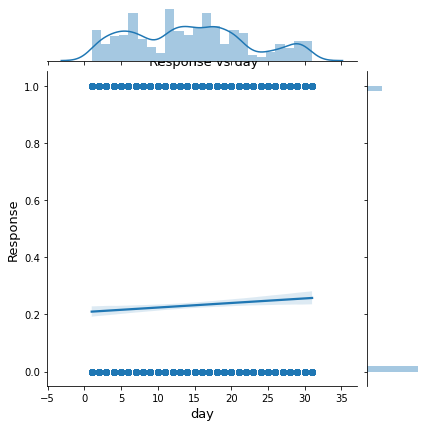

<Figure size 864x576 with 0 Axes>

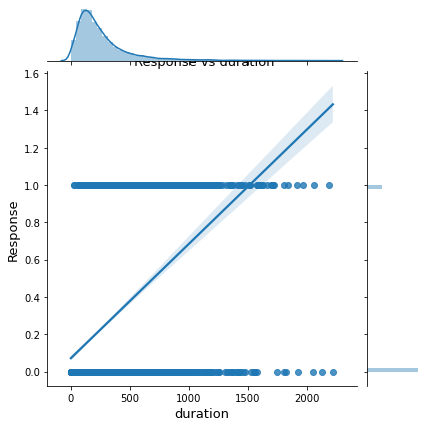

<Figure size 864x576 with 0 Axes>

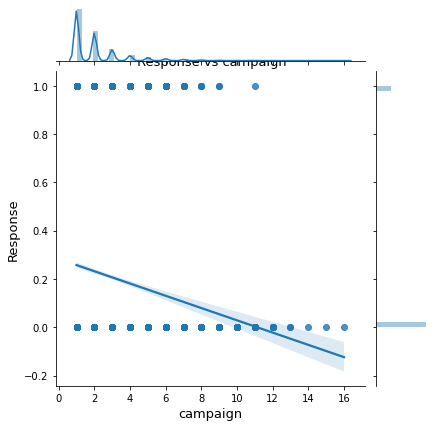

<Figure size 864x576 with 0 Axes>

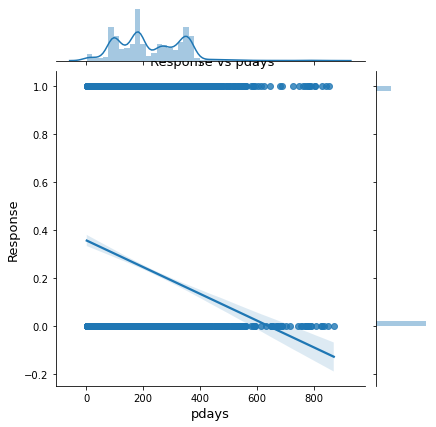

<Figure size 864x576 with 0 Axes>

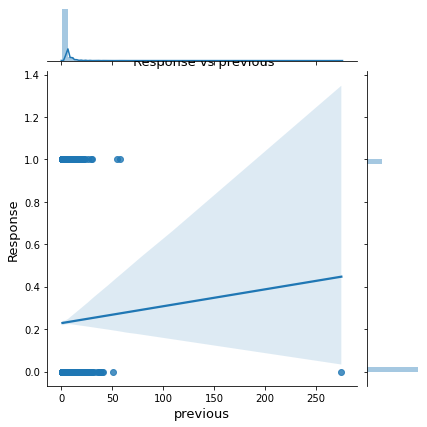

<Figure size 864x576 with 0 Axes>

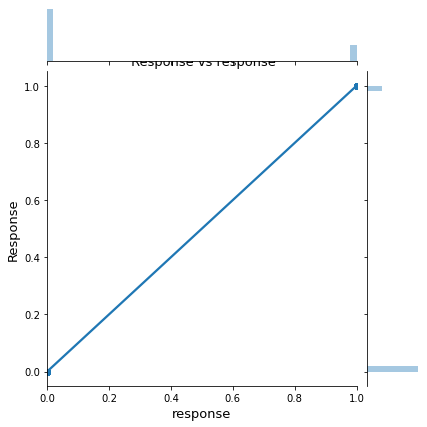

In [834]:
for col in  numeric_data[1:]:
    plt.figure(figsize=(12,8));
    sns.jointplot(numeric_data[col],bank1['response'],kind= 'reg');
    plt.title("\n Response vs "+col, fontsize=13);
    plt.xlabel(col,fontsize=13);
    plt.ylabel("Response",fontsize=13);
    plt.show();
 

In [835]:
numeric_data1 = ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous']

categorical_data1 =['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome']
categorical_data2 =['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome']

In [836]:
training_features1 = training_features.copy()

In [837]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(training_features1[numeric_data1])

StandardScaler()

In [838]:
training_features1[numeric_data1] =ss.transform(training_features1[numeric_data1])

In [839]:
training_features1[numeric_data1]

,age,salary,balance,day,duration,campaign,pdays,previous
24060,-0.696148,-0.237941,-0.220520,0.847462,-0.940155,-0.676582,-0.637936,-0.038931
24062,0.091634,-0.237941,-0.589425,0.847462,1.100715,-0.676582,-0.507883,-0.477475
24064,-0.696148,0.391198,0.616624,0.847462,-0.493715,-0.676582,-1.158151,0.180341
24072,-0.433554,1.334907,0.280394,0.973745,-0.795593,-0.676582,-1.201502,0.180341
24077,-0.433554,1.334907,-0.508717,1.100028,-0.510722,-0.676582,-0.707298,-0.038931
...,...,...,...,...,...,...,...,...
45199,-0.608616,-1.181649,-0.026755,0.216045,3.851637,0.604587,2.648085,1.934518
45201,1.054478,1.334907,-0.318219,0.342328,-0.145066,-0.676582,-0.351818,0.180341
45204,2.805103,-0.080656,0.422532,0.342328,0.169568,-0.676582,-1.600333,1.057429
45208,2.717572,-0.080656,1.358682,0.342328,3.685816,1.885756,-0.351818,-0.038931


In [840]:
training_features1 = pd.get_dummies(training_features1,columns = categorical_data2)


In [841]:
print(training_features1)

            age    salary   balance       day  duration  campaign     pdays  \
24060 -0.696148 -0.237941 -0.220520  0.847462 -0.940155 -0.676582 -0.637936   
24062  0.091634 -0.237941 -0.589425  0.847462  1.100715 -0.676582 -0.507883   
24064 -0.696148  0.391198  0.616624  0.847462 -0.493715 -0.676582 -1.158151   
24072 -0.433554  1.334907  0.280394  0.973745 -0.795593 -0.676582 -1.201502   
24077 -0.433554  1.334907 -0.508717  1.100028 -0.510722 -0.676582 -0.707298   
...         ...       ...       ...       ...       ...       ...       ...   
45199 -0.608616 -1.181649 -0.026755  0.216045  3.851637  0.604587  2.648085   
45201  1.054478  1.334907 -0.318219  0.342328 -0.145066 -0.676582 -0.351818   
45204  2.805103 -0.080656  0.422532  0.342328  0.169568 -0.676582 -1.600333   
45208  2.717572 -0.080656  1.358682  0.342328  3.685816  1.885756 -0.351818   
45210 -0.346023  1.964046  0.462069  0.342328  0.428928 -0.035997 -0.317137   

       previous  job_admin.  job_blue-collar  ...  

In [842]:
categorical_dummies = list(set(training_features1)-set(numeric_data1))

In [843]:
print(categorical_dummies)

['job_unknown', 'contact_cellular', 'month_jan', 'education_primary', 'month_oct', 'contact_telephone', 'job_blue-collar', 'month_nov', 'month_sep', 'poutcome_other', 'job_services', 'targeted_no', 'contact_unknown', 'poutcome_success', 'job_retired', 'job_unemployed', 'loan_yes', 'job_student', 'job_management', 'default_no', 'marital_divorced', 'month_apr', 'job_housemaid', 'month_jun', 'education_unknown', 'loan_no', 'job_admin.', 'poutcome_unknown', 'job_self-employed', 'month_feb', 'targeted_yes', 'education_tertiary', 'housing_no', 'housing_yes', 'month_aug', 'default_yes', 'month_may', 'month_mar', 'month_jul', 'marital_married', 'education_secondary', 'job_entrepreneur', 'marital_single', 'poutcome_failure', 'job_technician', 'month_dec']


In [844]:
training_features1.corr()

,age,salary,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,0.058322,0.115480,0.018399,0.060519,0.003842,-0.107863,0.002280,-0.056485,-0.065186,...,0.001593,0.033611,-0.115093,0.040473,0.065865,0.041503,-0.017661,-0.056290,0.083340,-0.005070
salary,0.058322,1.000000,0.066079,0.002379,0.005734,-0.018559,-0.106134,0.028427,-0.092743,-0.583122,...,0.052788,0.019802,-0.072902,0.044051,0.013673,0.031230,-0.001281,-0.020843,0.023300,0.011952
balance,0.115480,0.066079,1.000000,0.051732,0.040998,-0.008150,-0.108122,0.001570,-0.049657,-0.067227,...,0.025884,0.026520,-0.088034,0.079877,0.034322,0.024951,-0.035962,-0.012155,0.059139,-0.005887
day,0.018399,0.002379,0.051732,1.000000,-0.012687,-0.029295,-0.090095,-0.016801,-0.008088,-0.013784,...,-0.083358,-0.010789,-0.169201,0.173661,0.073999,-0.060587,-0.018696,0.012564,0.009572,0.010292
duration,0.060519,0.005734,0.040998,-0.012687,1.000000,-0.088394,-0.024407,-0.002150,-0.021735,-0.022273,...,0.016422,-0.005571,-0.033254,-0.034432,0.025751,0.029638,-0.081865,-0.010026,0.114196,0.009198
campaign,0.003842,-0.018559,-0.008150,-0.029295,-0.088394,1.000000,0.050534,0.135523,-0.030768,0.046945,...,-0.033300,-0.011766,0.109198,-0.028821,-0.056541,-0.031520,-0.058349,0.138998,-0.075825,0.005421
pdays,-0.107863,-0.106134,-0.108122,-0.090095,-0.024407,0.050534,1.000000,-0.021885,0.021710,0.194500,...,-0.099809,-0.033519,0.375726,-0.260052,-0.074586,-0.020778,0.177403,0.023706,-0.251611,0.011743
previous,0.002280,0.028427,0.001570,-0.016801,-0.002150,0.135523,-0.021885,1.000000,0.000993,-0.014862,...,0.004641,0.003205,0.003731,-0.017961,0.007101,0.014243,-0.074458,0.097654,-0.010595,0.001201
job_admin.,-0.056485,-0.092743,-0.049657,-0.008088,-0.021735,-0.030768,0.021710,0.000993,1.000000,-0.192347,...,0.000984,-0.004540,0.012004,-0.042044,0.014180,0.008844,-0.002466,-0.001440,0.004366,0.004955
job_blue-collar,-0.065186,-0.583122,-0.067227,-0.013784,-0.022273,0.046945,0.194500,-0.014862,-0.192347,1.000000,...,-0.063150,-0.053013,0.155631,-0.024864,-0.064289,-0.065993,0.067240,0.029822,-0.116738,-0.012147


In [845]:
from sklearn.preprocessing import LabelEncoder
bank2 = bank1[categorical_data1].apply(LabelEncoder().fit_transform) 


In [847]:
bank3 = bank2.join(bank1[numeric_data1])
bank3

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,1,2,1,1,0,1,0,0,9,1,34,20000,1475,16,1166,3,530,12
45201,4,1,2,1,0,0,0,0,9,2,53,100000,583,17,226,1,184,4
45204,5,1,1,1,0,0,0,0,9,0,73,55000,2850,17,300,1,40,8
45208,5,1,1,1,0,0,0,0,9,2,72,55000,5715,17,1127,5,184,3


# # Logistic regression

In [848]:
X = training_features1
y = target_variable

In [849]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [850]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(X_train,y_train)
print(model)

LogisticRegression()


In [851]:
from sklearn.model_selection import cross_val_score

In [852]:
c_value = cross_val_score(lr,X_train,y_train)

np.mean(c_value)

0.8413323239969719

# model evaluation

In [853]:
y_pred = lr.predict(X_test)

In [854]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.8426150121065376


In [855]:
from sklearn.metrics import classification_report
print('classification_report:\n',classification_report(y_pred,y_test)),

classification_report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      1335
           1       0.57      0.69      0.63       317

    accuracy                           0.84      1652
   macro avg       0.75      0.78      0.76      1652
weighted avg       0.86      0.84      0.85      1652



(None,)

In [856]:
from sklearn.metrics import f1_score,confusion_matrix
print('f1_score: ',f1_score(y_pred,y_test),'\nCM:\n',confusion_matrix(y_pred,y_test))

f1_score:  0.6275071633237823 
CM:
 [[1173  162]
 [  98  219]]


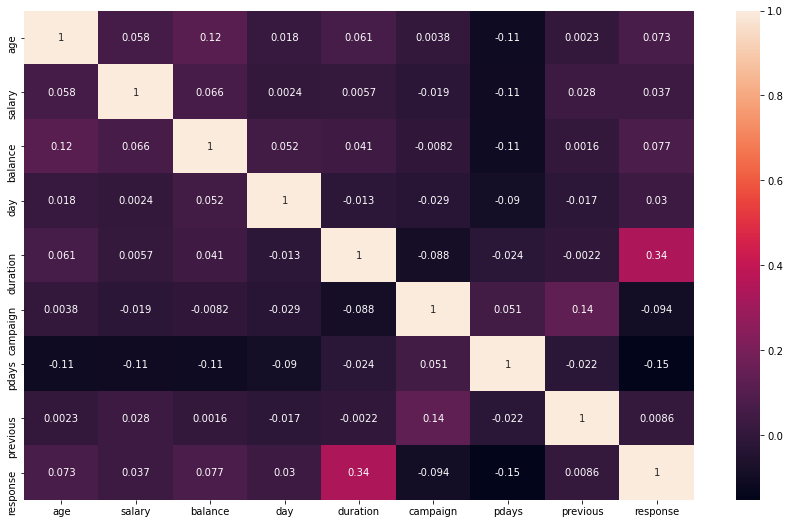

In [857]:
plt.figure(figsize = (15,9))
sns.heatmap(bank1.corr(),annot =  True)
plt.show()

# RFe

In [858]:
X1 = bank3
y1 = target_variable

In [859]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.2)

In [948]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

rfe = RFE(lr, 5)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [949]:
X_train.columns[rfe.support_]


Index(['month_jul', 'month_mar', 'month_oct', 'month_sep', 'poutcome_success'], dtype='object')

In [950]:
X_train.columns[rfe.support_]


Index(['month_jul', 'month_mar', 'month_oct', 'month_sep', 'poutcome_success'], dtype='object')

In [951]:
cols = X_train.columns[rfe.support_]
lr.fit(X_train[cols],y_train)

LogisticRegression()

In [953]:
y_pred2 = lr.predict(X_test[cols])
f1_score(y_pred2,y_test)

0.5575221238938054

In [954]:
confusion_matrix(y_pred2,y_test)

array([[1163,  192],
       [ 108,  189]], dtype=int64)

# VFI

In [866]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] =X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,age,11.94
2,education,6.56
3,targeted,6.43
11,salary,5.41
16,pdays,5.37
1,marital,4.38
13,day,4.11
8,month,3.60
5,housing,3.15
0,job,2.88


# RFC

In [908]:
from sklearn.ensemble import RandomForestClassifier

In [928]:
model1 = RandomForestClassifier(n_estimators = 41,random_state=37)

In [929]:
model1.fit(X_train,y_train
          )

RandomForestClassifier(n_estimators=41, random_state=37)

In [930]:
cv_score1 = cross_val_score(model1,X_train,y_train)
np.mean(cv_score)

0.8461771385314156

In [931]:
y_pre = model1.predict(X_test)

In [932]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1271
           1       0.70      0.55      0.62       381

    accuracy                           0.84      1652
   macro avg       0.79      0.74      0.76      1652
weighted avg       0.83      0.84      0.83      1652



In [933]:
f1_score(y_test,y_pre)

0.6169590643274854

In [941]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

RFE1 = RFE(model1,5)
RFE1.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(n_estimators=41, random_state=37),
    n_features_to_select=5)

In [942]:
RFE1.support_
X_train.columns[RFE1.support_]

Index(['age', 'balance', 'duration', 'pdays', 'poutcome_success'], dtype='object')

# SO HOUSING ,MONTH,Poutcome,duration,pdays are more important features considering both logistic and random classifier

In [944]:
cols = X_train.columns[RFE1.support_]

In [945]:
model1.fit(X_train[cols],y_train)

RandomForestClassifier(n_estimators=41, random_state=37)

In [946]:
y_pred3 = model1.predict(X_test[cols])

In [947]:
f1_score(y_pred3,y_test)

0.6149425287356322

    # RANDOM FOREST CLASSIFIER is better then logistic regression